In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(1)
sns.set_style("darkgrid")
tfont = {'fontsize':15, 'fontweight':'bold'}
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn .metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support as score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import NuSVC

In [2]:
data=pd.read_excel(r'C:\Users\path')

In [3]:
data.columns

Index(['genre ', 'age ', 'service adresseur ', 'délai entre services (jours)',
       'délai diag Ttt (jours)', 'Ttt_un', 'reponse_ligne_un', 'pheno  GC',
       'stade Ann Arbor ', 'tabac ', 'alcool', 'EBV', 'socio-eco',
       'double hit', 'triple hit', 'IPI', 'ext SN', 'COVID', 'TEP 2 cures ',
       'infection CMV', 'CoM', 'cat_age_un', 'cat_age_deux', 'cat_age_trois',
       'cat_age_quatre', 'surpoids', 'BMI_30_à_35', 'BMI_35_à_40',
       'BMI_sup_40', 'bmi'],
      dtype='object')

In [4]:
data.isnull().sum()

genre                            0
age                              0
service adresseur                0
délai entre services (jours)    11
délai diag Ttt (jours)           1
Ttt_un                           0
reponse_ligne_un                 0
pheno  GC                        0
stade Ann Arbor                  0
tabac                            0
alcool                           0
EBV                              0
socio-eco                        0
double hit                       0
triple hit                       0
IPI                              0
ext SN                           1
COVID                            0
TEP 2 cures                      0
infection CMV                    0
CoM                              0
cat_age_un                       0
cat_age_deux                     0
cat_age_trois                    0
cat_age_quatre                   0
surpoids                         0
BMI_30_à_35                      0
BMI_35_à_40                      0
BMI_sup_40          

In [5]:
data["reponse_ligne_un"].value_counts()

reponse_ligne_un
0    78
1    42
Name: count, dtype: int64

In [6]:
data.dtypes

genre                            object
age                             float64
service adresseur                object
délai entre services (jours)    float64
délai diag Ttt (jours)          float64
Ttt_un                           object
reponse_ligne_un                  int64
pheno  GC                        object
stade Ann Arbor                  object
tabac                            object
alcool                           object
EBV                              object
socio-eco                        object
double hit                       object
triple hit                       object
IPI                              object
ext SN                           object
COVID                            object
TEP 2 cures                      object
infection CMV                    object
CoM                              object
cat_age_un                        int64
cat_age_deux                      int64
cat_age_trois                     int64
cat_age_quatre                    int64


In [7]:
data[data==np.inf]=np.nan

Première partie  - Part one 

In [ ]:
Random forest 

In [8]:
data['cat_age_un']= data['cat_age_un'].astype('object')

In [9]:
data['cat_age_deux']= data['cat_age_deux'].astype('object')

In [10]:
data['cat_age_trois']= data['cat_age_trois'].astype('object')

In [11]:
data['cat_age_quatre']= data['cat_age_quatre'].astype('object')

In [12]:
data["ext SN"]=data["ext SN"].fillna("non")

In [13]:
data.loc[data["genre "]=="femme ",'genre ']="femme"

In [14]:
data.loc[data["Ttt_un"]=="R-CEOP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="EPOCH",'Ttt_un']="R-DA-EPOCH"

In [15]:
data.loc[data["Ttt_un"]=="R-CEOP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-GEMOX",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-CVP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-leukeran",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="CHOEP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R_DAOX",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="COP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-COP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="endoxan-steroide",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="VCR",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="mini-CHOP",'Ttt_un']="R-mini-CHOP"
data.loc[data["Ttt_un"]=="R-CHOEP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-CTOP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="OP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="CHOP",'Ttt_un']="R-CHOP"

In [16]:
data.loc[data["Ttt_un"]=="R-MPVA",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-DA-EPOCH",'Ttt_un']="R-DAEPOCH"
data.loc[data["Ttt_un"]=="DHAP",'Ttt_un']="R-CHOP"
data.loc[data["Ttt_un"]=="R-IFO-VP16",'Ttt_un']="R-CHOP"

In [17]:
data["Ttt_un"].value_counts()

Ttt_un
R-CHOP         93
R-mini-CHOP    14
R-ACVBP         7
R-DAEPOCH       5
R-DAOX          1
Name: count, dtype: int64

In [18]:
data["Ttt_un"]= data["Ttt_un"].astype('object')

In [19]:
data.loc[data["service adresseur "]=="medecin traitant",'service adresseur ']="MT"
data.loc[data["service adresseur "]=="HGE",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="pneumo",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="oncologie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="geriatrie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="gériatrie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="hemato",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="urgences ",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="chirurgie digestive",'service adresseur ']="chirurgie"
data.loc[data["service adresseur "]=="gosselies",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="Gosselies",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="ORL extra",'service adresseur ']="chirurgie"
data.loc[data["service adresseur "]=="ORL intra",'service adresseur ']="chirurgie"
data.loc[data["service adresseur "]=="nephrologie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="medecine interne",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="gyneco",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="Chirurgie maxillaire",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="neurochirugie",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="neurochirurgie",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="Espagne",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="urologie",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="cardiologie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="indéterminé",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="nephrologie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="endocrino",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="rhumatologie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="ortho",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="neurologie",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="dermato",'service adresseur ']="medecine"
data.loc[data["service adresseur "]=="orthopedie",'service adresseur ']="gyneco"
data.loc[data["service adresseur "]=="CHU",'service adresseur ']="medecine"

In [20]:
data['service adresseur ']= data['service adresseur '].astype('object')

In [21]:
data["service adresseur "].value_counts()

service adresseur 
medecine     76
MT           25
gyneco       10
chirurgie     9
Name: count, dtype: int64

In [22]:
data.loc[data["stade Ann Arbor "]=="non_evalue",'stade Ann Arbor ']="quatre"

In [23]:
data['délai entre services (jours)']=data['délai entre services (jours)'].fillna(17.5)

In [24]:
data['délai diag Ttt (jours)']= data['délai diag Ttt (jours)'].fillna(6)

In [25]:
data.loc[data["socio-eco"]=="deficient",'socio-eco']="précaire"

In [26]:
data["socio-eco"]= data["socio-eco"].astype('object')

In [27]:
X = data.drop(columns='reponse_ligne_un')
y = data['reponse_ligne_un']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 1)

In [29]:
cat_col = list(X_train.select_dtypes('object'))
float_col = list(X_train.select_dtypes(float))

cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))

float_pipe = make_pipeline(KNNImputer())

preprocessor = make_column_transformer((cat_pipe, cat_col),
                                       (float_pipe, float_col),
                                       remainder='passthrough')

In [30]:
# foret aléatoire - Random forest 

In [31]:
foret_aleatoire = make_pipeline(preprocessor,RandomForestClassifier())

params = {'randomforestclassifier__n_estimators':[50,75],
          'randomforestclassifier__max_depth': [3,5],
          'randomforestclassifier__max_samples':[0.5, 0.75],
          'randomforestclassifier__min_samples_split': [2, 5, 10],
          'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__max_features': ['sqrt', 'log2', None]
         }
                            
grid = GridSearchCV(foret_aleatoire, param_grid=params, verbose=1, scoring='recall',cv=10)

grid.fit(X_train, y_train)

print(grid.best_params_)
foretaleatoire = grid.best_estimator_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': None, 'randomforestclassifier__max_samples': 0.75, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}


In [32]:
predictions = foretaleatoire.predict(X_test)

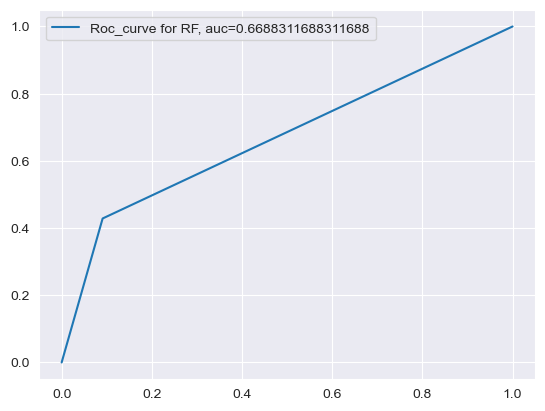

In [33]:
fpr,tpr, _ =metrics.roc_curve(y_test,predictions)
auc=metrics.roc_auc_score(y_test,predictions)
plt.plot(fpr,tpr, label="Roc_curve for RF, auc=" +str(auc))
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.75      0.43      0.55         7

    accuracy                           0.72        18
   macro avg       0.73      0.67      0.67        18
weighted avg       0.73      0.72      0.70        18



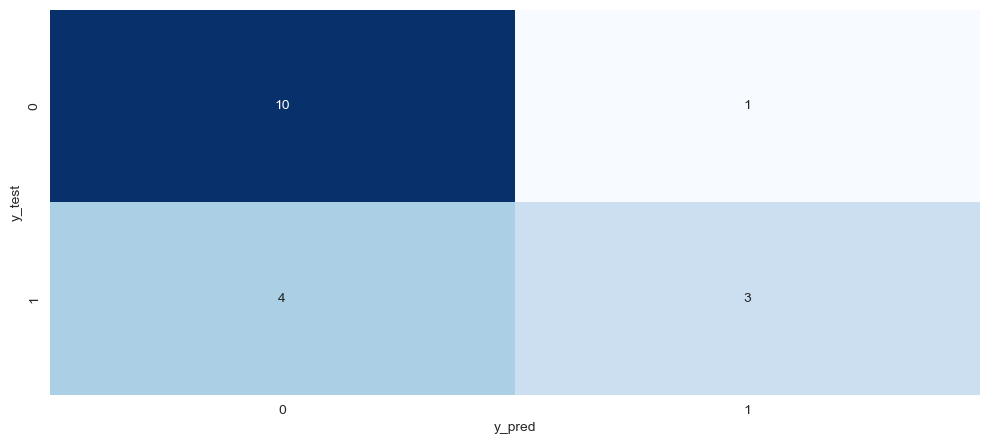

In [34]:
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [35]:
from sklearn import metrics 

In [36]:
import sklearn.metrics

In [37]:
sklearn.metrics.f1_score(y_test, predictions, average="macro")

0.6727272727272727

Seconde partie - PArt two 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(1)
sns.set_style("darkgrid")
tfont = {'fontsize':15, 'fontweight':'bold'}
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn .metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support as score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import NuSVC

In [2]:
data=pd.read_excel(r'C:\Users\path')

In [3]:
data[data==np.inf]=np.nan

In [4]:
data["ext SN"]=data["ext SN"].fillna("non")

In [5]:
data.loc[data["ext SN"]=="oui",'ext SN']=1
data.loc[data["ext SN"]=="non",'ext SN']=2

In [6]:
data["ext SN"].value_counts()

ext SN
2    116
1      4
Name: count, dtype: int64

In [7]:
data['ext SN']= data['ext SN'].astype('int')

In [8]:
data["socio-eco"].value_counts()

socio-eco
normal       111
précaire       6
résidence      2
deficient      1
Name: count, dtype: int64

In [9]:
data.loc[data["socio-eco"]=="normal",'socio-eco']=1
data.loc[data["socio-eco"]=="précaire",'socio-eco']=2
data.loc[data["socio-eco"]=="précaire ",'socio-eco']=2
data.loc[data["socio-eco"]=="résidence",'socio-eco']=3
data.loc[data["socio-eco"]=="deficient",'socio-eco']=2

In [10]:
data["socio-eco"]= data["socio-eco"].astype('int')

In [11]:
data["EBV"].value_counts()

EBV
non    117
pos      3
Name: count, dtype: int64

In [12]:
data.loc[data["EBV"]=="non",'EBV']=1
data.loc[data["EBV"]=="pos",'EBV']=2

In [13]:
data["EBV"]=data["EBV"].fillna(1)

In [14]:
data["EBV"]= data["EBV"].astype('int')

In [15]:
data.loc[data["infection CMV"]=="oui",'infection CMV']=1
data.loc[data["infection CMV"]=="non",'infection CMV']=2
data.loc[data["infection CMV"]=="oui ",'infection CMV']=1

In [16]:
data["infection CMV"]= data["infection CMV"].astype('int')

In [17]:
data["Ttt_un"].value_counts()

Ttt_un
R-CHOP              64
R-mini-CHOP         14
R-ACVBP              7
R-CEOP               5
R-MPVA               4
COP                  4
R-DAEPOCH            3
R-CVP                2
R-GEMOX              2
R_DAOX               1
DHAP                 1
endoxan-steroide     1
CHOEP                1
VCR                  1
R-IFO-VP16           1
R-DA-EPOCH           1
R-COP                1
R-CHOEP              1
EPOCH                1
R-CTOP               1
R-leukeran           1
OP                   1
CHOP                 1
R-DAOX               1
Name: count, dtype: int64

In [18]:
data.loc[data["Ttt_un"]=="R-CHOP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-mini-CHOP",'Ttt_un']=2
data.loc[data["Ttt_un"]=="R-MPVA",'Ttt_un']=3
data.loc[data["Ttt_un"]=="R-ACVBP",'Ttt_un']=4
data.loc[data["Ttt_un"]=="EPOCH",'Ttt_un']=5
data.loc[data["Ttt_un"]=="R-IFO-VP16",'Ttt_un']=6

In [19]:
data.loc[data["Ttt_un"]=="R-CEOP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-DAEPOCH",'Ttt_un']=5
data.loc[data["Ttt_un"]=="EPOCH",'Ttt_un']=5
data.loc[data["Ttt_un"]=="R-GEMOX",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-DA-EPOCH",'Ttt_un']=5
data.loc[data["Ttt_un"]=="R-CVP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-leukeran",'Ttt_un']=1
data.loc[data["Ttt_un"]=="CHOEP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R_DAOX",'Ttt_un']=1
data.loc[data["Ttt_un"]=="COP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-COP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="endoxan-steroide",'Ttt_un']=1
data.loc[data["Ttt_un"]==27,'Ttt_un']=7
data.loc[data["Ttt_un"]=="VCR",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-IFO-VP16",'Ttt_un']=6
data.loc[data["Ttt_un"]=="mini-CHOP",'Ttt_un']=2
data.loc[data["Ttt_un"]=="R-CHOEP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="R-CTOP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="OP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="CHOP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="DHAP",'Ttt_un']=1
data.loc[data["Ttt_un"]=="DHAP",'Ttt_un']=1

In [20]:
data.loc[data["Ttt_un"]=="R-DAOX",'Ttt_un']=1

In [21]:
data.loc[data["Ttt_un"]=="DHAP",'Ttt_un']=7

In [22]:
data['Ttt_un']= data['Ttt_un'].astype('int')

In [23]:
#data["Ttt_un"].value_counts()

In [24]:
data["genre "].value_counts()

genre 
homme     64
femme     52
femme      4
Name: count, dtype: int64

In [25]:
data.loc[data["genre "]=="femme ",'genre ']="femme"

In [26]:
data.loc[data["genre "]=="femme",'genre ']=1
#data.loc[data["genre "]=="femme ",'genre ']="femme"
data.loc[data["genre "]=="homme",'genre ']=2

In [27]:
#second.columns

In [28]:
data['genre ']= data['genre '].astype('int')

In [29]:
data["service adresseur "].value_counts()

service adresseur 
medecin traitant        25
hemato                  16
HGE                     16
oncologie                9
pneumo                   6
gériatrie                5
chirurgie digestive      4
medecine interne         4
urologie                 4
urgences                 3
ORL intra                3
indéterminé              3
gyneco                   2
rhumatologie             2
Chirurgie maxillaire     2
cardiologie              2
endocrino                2
gosselies                2
ORL extra                2
orthopedie               1
Espagne                  1
nephrologie              1
ortho                    1
Gosselies                1
geriatrie                1
neurologie               1
CHU                      1
Name: count, dtype: int64

In [30]:
data["service adresseur "].value_counts()

service adresseur 
medecin traitant        25
hemato                  16
HGE                     16
oncologie                9
pneumo                   6
gériatrie                5
chirurgie digestive      4
medecine interne         4
urologie                 4
urgences                 3
ORL intra                3
indéterminé              3
gyneco                   2
rhumatologie             2
Chirurgie maxillaire     2
cardiologie              2
endocrino                2
gosselies                2
ORL extra                2
orthopedie               1
Espagne                  1
nephrologie              1
ortho                    1
Gosselies                1
geriatrie                1
neurologie               1
CHU                      1
Name: count, dtype: int64

In [31]:
data.loc[data["service adresseur "]=="chirugie",'service adresseur ']="chirurgie"

In [32]:
data.loc[data["service adresseur "]=="MT",'service adresseur ']=1
data.loc[data["service adresseur "]=="medecine",'service adresseur ']=2
data.loc[data["service adresseur "]=="chirurgie",'service adresseur ']=3
data.loc[data["service adresseur "]=="gyneco",'service adresseur ']=4

In [33]:
data.loc[data["service adresseur "]=="medecin traitant",'service adresseur ']=1
data.loc[data["service adresseur "]=="HGE",'service adresseur ']=2
data.loc[data["service adresseur "]=="pneumo",'service adresseur ']=2
data.loc[data["service adresseur "]=="oncologie",'service adresseur ']=2
data.loc[data["service adresseur "]=="geriatrie",'service adresseur ']=2
data.loc[data["service adresseur "]=="gériatrie",'service adresseur ']=2
data.loc[data["service adresseur "]=="hemato",'service adresseur ']=2
data.loc[data["service adresseur "]=="urgences ",'service adresseur ']=2
data.loc[data["service adresseur "]=="chirurgie digestive",'service adresseur ']=3
data.loc[data["service adresseur "]=="gosselies",'service adresseur ']=2
data.loc[data["service adresseur "]=="Gosselies",'service adresseur ']=2
data.loc[data["service adresseur "]=="ORL extra",'service adresseur ']=3
data.loc[data["service adresseur "]=="ORL intra",'service adresseur ']=3
data.loc[data["service adresseur "]=="nephrologie",'service adresseur ']=2
data.loc[data["service adresseur "]=="medecine interne",'service adresseur ']=2
data.loc[data["service adresseur "]=="gyneco",'service adresseur ']=4
data.loc[data["service adresseur "]=="Chirurgie maxillaire",'service adresseur ']=3
data.loc[data["service adresseur "]=="neurochirugie",'service adresseur ']=3
data.loc[data["service adresseur "]=="neurochirurgie",'service adresseur ']=3
data.loc[data["service adresseur "]=="Espagne",'service adresseur ']=2
data.loc[data["service adresseur "]=="urologie",'service adresseur ']=3
data.loc[data["service adresseur "]=="cardiologie",'service adresseur ']=2
data.loc[data["service adresseur "]=="indéterminé",'service adresseur ']=2
data.loc[data["service adresseur "]=="nephrologie",'service adresseur ']=2
data.loc[data["service adresseur "]=="endocrino",'service adresseur ']=2
data.loc[data["service adresseur "]=="rhumatologie",'service adresseur ']=2
data.loc[data["service adresseur "]=="ortho",'service adresseur ']=3
data.loc[data["service adresseur "]=="neurologie",'service adresseur ']=2
data.loc[data["service adresseur "]=="dermato",'service adresseur ']=2
data.loc[data["service adresseur "]=="orthopedie",'service adresseur ']=3
data.loc[data["service adresseur "]=="CHU",'service adresseur ']=2

In [34]:
data['service adresseur ']= data['service adresseur '].astype('int')

In [35]:
data["pheno  GC"].value_counts()

pheno  GC
non    80
oui    40
Name: count, dtype: int64

In [36]:
data.loc[data["pheno  GC"]=="non",'pheno  GC']=1
data.loc[data["pheno  GC"]=="oui",'pheno  GC']=2
#data.loc[data["pheno  GC"]=="nonap",'pheno  GC']=3

In [37]:
data['pheno  GC']=data['pheno  GC'].fillna(1)

In [38]:
data['pheno  GC']= data['pheno  GC'].astype('int')

In [39]:
data["stade Ann Arbor "].value_counts()

stade Ann Arbor 
quatre        72
trois         17
deux          17
un            13
non_evalue     1
Name: count, dtype: int64

In [40]:
data.loc[data["stade Ann Arbor "]=="non_evalue",'stade Ann Arbor ']="quatre"

In [41]:
data.loc[data["stade Ann Arbor "]=="un",'stade Ann Arbor ']=1
data.loc[data["stade Ann Arbor "]=="deux",'stade Ann Arbor ']=2
data.loc[data["stade Ann Arbor "]=="trois",'stade Ann Arbor ']=3
data.loc[data["stade Ann Arbor "]=="quatre",'stade Ann Arbor ']=4
#second.loc[second["stade Ann Arbor "]=="non_evalue",'stade Ann Arbor ']=4

In [42]:
#data["stade Ann Arbor "].value_counts()

In [43]:
data['stade Ann Arbor ']= data['stade Ann Arbor '].astype('int')

In [44]:
data["tabac "].value_counts()

tabac 
non    83
oui    37
Name: count, dtype: int64

In [45]:
data.loc[data["tabac "]=="oui",'tabac ']=1
data.loc[data["tabac "]=="non",'tabac ']=2

In [46]:
data['tabac ']= data['tabac '].astype('int')

In [47]:
#data["tabac "].value_counts()

In [48]:
data["alcool"].value_counts()

alcool
non    105
oui     15
Name: count, dtype: int64

In [49]:
data.loc[data["alcool"]=="oui",'alcool']=1
data.loc[data["alcool"]=="non",'alcool']=2

In [50]:
data['alcool']= data['alcool'].astype('int')

In [51]:
data["IPI"].value_counts()

IPI
un        38
quatre    27
trois     25
deux      17
cinq      10
zero       3
Name: count, dtype: int64

In [52]:
data.loc[data["IPI"]=="cinq ",'IPI']=5

In [53]:
data.loc[data["IPI"]=="un",'IPI']=1
data.loc[data["IPI"]=="deux",'IPI']=2
data.loc[data["IPI"]=="deux ",'IPI']=2
data.loc[data["IPI"]=="trois",'IPI']=3
data.loc[data["IPI"]=="quatre",'IPI']=4
data.loc[data["IPI"]=="cinq",'IPI']=5
#data.loc[data["IPI"]=="nonap",'IPI']=6
#data.loc[data["IPI"]=="Mantle_six",'IPI']=7
#data.loc[data["IPI"]=="Mantle_trois",'IPI']=8
data.loc[data["IPI"]=="zero",'IPI']=1

In [54]:
data['IPI']= data['IPI'].astype('int')

In [55]:
data['délai entre services (jours)']=data['délai entre services (jours)'].fillna(17.5)

In [56]:
data['délai diag Ttt (jours)']= data['délai diag Ttt (jours)'].fillna(6)

In [57]:
data['bmi']=data['bmi'].astype('float')

In [58]:
data["COVID"].value_counts()

COVID
inexistant    58
non           47
oui           15
Name: count, dtype: int64

In [59]:
data.loc[data["COVID"]=="non",'COVID']=2
data.loc[data["COVID"]=="oui",'COVID']=1
data.loc[data["COVID"]=="oui ",'COVID']=1
data.loc[data["COVID"]=="inexistant",'COVID']=3

In [60]:
data["TEP 2 cures "].value_counts()

TEP 2 cures 
nonap          52
non_fait       29
remission      16
RMP            13
refractaire    10
Name: count, dtype: int64

In [61]:
data.loc[data["TEP 2 cures "]=="nonap",'TEP 2 cures ']=1
data.loc[data["TEP 2 cures "]=="non_fait",'TEP 2 cures ']=2
data.loc[data["TEP 2 cures "]=="remission",'TEP 2 cures ']=3
data.loc[data["TEP 2 cures "]=="RMP",'TEP 2 cures ']=4
data.loc[data["TEP 2 cures "]=="refractaire",'TEP 2 cures ']=5
data.loc[data["TEP 2 cures "]=="réfractaire",'TEP 2 cures ']=5

In [62]:
data['TEP 2 cures ']= data['TEP 2 cures '].astype('int')

In [63]:
data["CoM"].value_counts()

CoM
oui    62
non    58
Name: count, dtype: int64

In [64]:
data.loc[data["CoM"]=="non",'CoM']=1
data.loc[data["CoM"]=="oui",'CoM']=2

In [65]:
data['CoM']= data['CoM'].astype('int')

In [66]:
data.loc[data["surpoids"]=="oui",'surpoids']=1
data.loc[data["surpoids"]=="non",'surpoids']=2

In [67]:
data['surpoids']= data['surpoids'].astype('int')

In [68]:
data.loc[data["BMI_30_à_35"]=="oui",'BMI_30_à_35']=1
data.loc[data["BMI_30_à_35"]=="non",'BMI_30_à_35']=2

In [69]:
data['BMI_30_à_35']= data['BMI_30_à_35'].astype('int')

In [70]:
#data["BMI_35_à_40"].value_counts()

In [71]:
data.loc[data["BMI_35_à_40"]=="oui",'BMI_35_à_40']=1
data.loc[data["BMI_35_à_40"]=="non",'BMI_35_à_40']=2

In [72]:
data['BMI_35_à_40']= data['BMI_35_à_40'].astype('int')

In [73]:
#data["BMI_sup_40"].value_counts()

In [74]:
data.loc[data["BMI_sup_40"]=="oui",'BMI_sup_40']=1
data.loc[data["BMI_sup_40"]=="non",'BMI_sup_40']=2

In [75]:
data['BMI_sup_40']= data['BMI_sup_40'].astype('int')

In [76]:
#data["double hit"].value_counts()

In [77]:
data.loc[data["double hit"]=="oui",'double hit']=1
data.loc[data["double hit"]=="non",'double hit']=2

In [78]:
data['double hit']= data['double hit'].astype('int')

In [79]:
#data["triple hit"].value_counts()

In [80]:
data.loc[data["triple hit"]=="oui",'triple hit']=1
data.loc[data["triple hit"]=="non",'triple hit']=2

In [81]:
data['triple hit']= data['triple hit'].astype('int')

In [82]:
data.dtypes

genre                             int32
age                             float64
service adresseur                 int32
délai entre services (jours)    float64
délai diag Ttt (jours)          float64
Ttt_un                            int32
reponse_ligne_un                  int64
pheno  GC                         int32
stade Ann Arbor                   int32
tabac                             int32
alcool                            int32
EBV                               int32
socio-eco                         int32
double hit                        int32
triple hit                        int32
IPI                               int32
ext SN                            int32
COVID                            object
TEP 2 cures                       int32
infection CMV                     int32
CoM                               int32
cat_age_un                        int64
cat_age_deux                      int64
cat_age_trois                     int64
cat_age_quatre                    int64


In [83]:
data['cat_age_un']= data['cat_age_un'].astype('int')

In [84]:
data['COVID'].value_counts()

COVID
3    58
2    47
1    15
Name: count, dtype: int64

In [85]:
data['COVID']= data['COVID'].astype('int')

In [86]:
data['cat_age_deux']= data['cat_age_deux'].astype('int')

In [87]:
data['cat_age_trois']= data['cat_age_trois'].astype('int')

In [88]:
data['cat_age_quatre']= data['cat_age_quatre'].astype('int')

XGBoost

In [89]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [90]:
X = data.drop(columns='reponse_ligne_un')
y = data['reponse_ligne_un']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=1)

In [92]:
# Créer un classifieur XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='recall', cv=10, verbose=1)

# Entraîner le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Prédire les labels sur l'ensemble de test
y_pred = grid_search.best_estimator_.predict(X_test)



Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [93]:
# Calculer et afficher l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


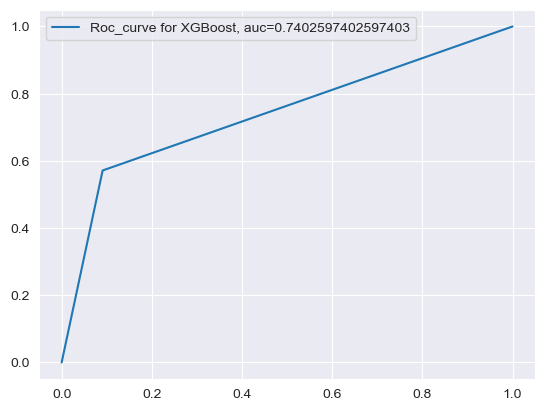

In [94]:
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr, label="Roc_curve for XGBoost, auc=" +str(auc))
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.80      0.57      0.67         7

    accuracy                           0.78        18
   macro avg       0.78      0.74      0.75        18
weighted avg       0.78      0.78      0.77        18



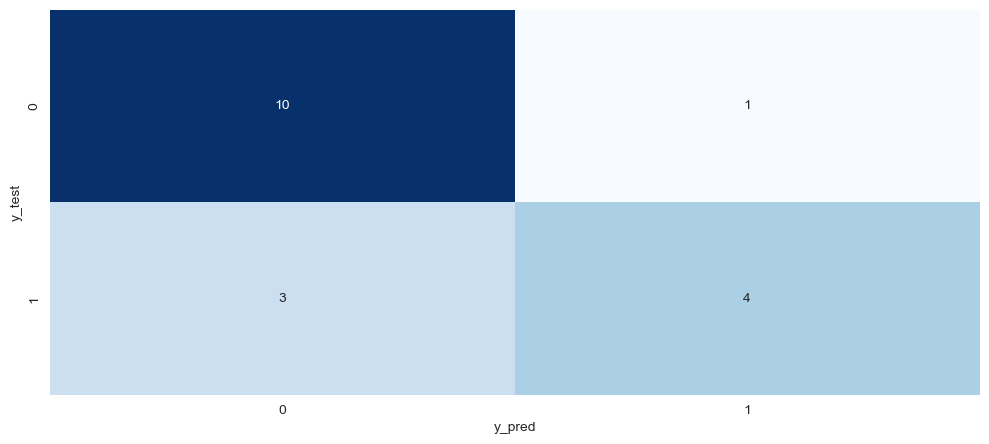

In [95]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [98]:
import sklearn.metrics

In [99]:
sklearn.metrics.f1_score(y_test, y_pred, average="macro")

0.75

SVM 

In [100]:
from sklearn.svm import NuSVC

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=1)

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [103]:
X_test_scaled = scaler.transform(X_test)

In [104]:
# Définir le modèle SVM
svc = NuSVC()

# Définir la grille des paramètres à rechercher
param_grid = {
    
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Configurer le GridSearchCV avec une validation croisée de 10 fois
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, verbose=2, n_jobs=-1)

# Exécuter la recherche sur la grille
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés par GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred_deux = best_model.predict(X_test_scaled)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters found: {'gamma': 0.01, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.57      0.57      0.57         7

    accuracy                           0.67        18
   macro avg       0.65      0.65      0.65        18
weighted avg       0.67      0.67      0.67        18



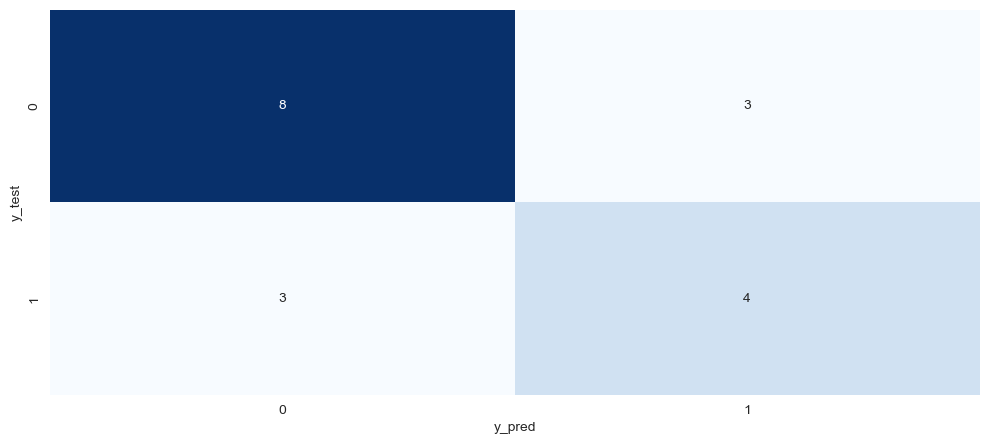

In [105]:
print(classification_report(y_test, y_pred_deux))
cm = confusion_matrix(y_test, y_pred_deux)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

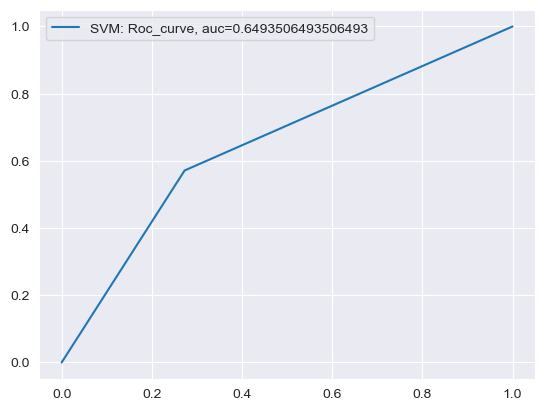

In [106]:
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_deux)
auc=metrics.roc_auc_score(y_test,y_pred_deux)
plt.plot(fpr,tpr, label="SVM: Roc_curve, auc=" +str(auc))
plt.legend()
plt.show()

In [107]:
import sklearn.metrics

In [108]:
sklearn.metrics.f1_score(y_test, y_pred_deux, average="macro")

0.6493506493506493

In [ ]:
Naive Bayes classifier

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
from sklearn.naive_bayes import CategoricalNB

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [112]:
cat_nb = CategoricalNB()

In [113]:
cat_nb.fit(X_train, y_train)

CategoricalNB()

In [114]:
y_pred_2 = cat_nb.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.83      0.71      0.77         7

    accuracy                           0.83        18
   macro avg       0.83      0.81      0.82        18
weighted avg       0.83      0.83      0.83        18



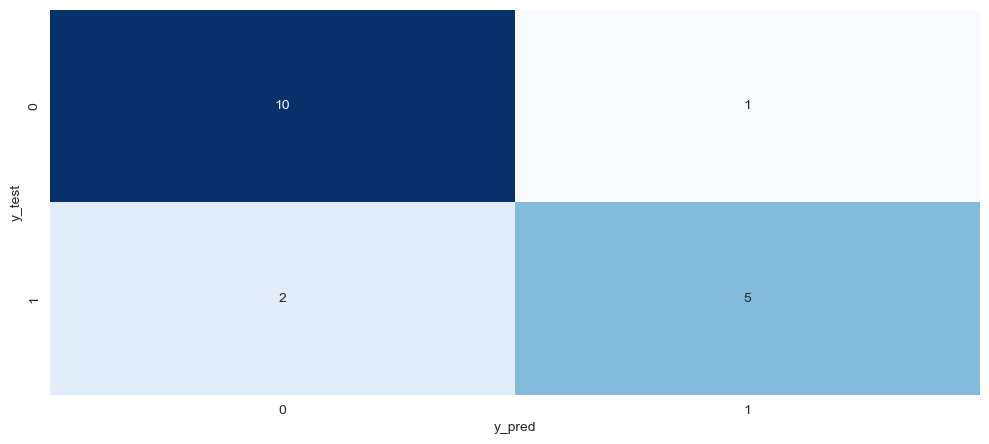

In [115]:
print(classification_report(y_test, y_pred_2))
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

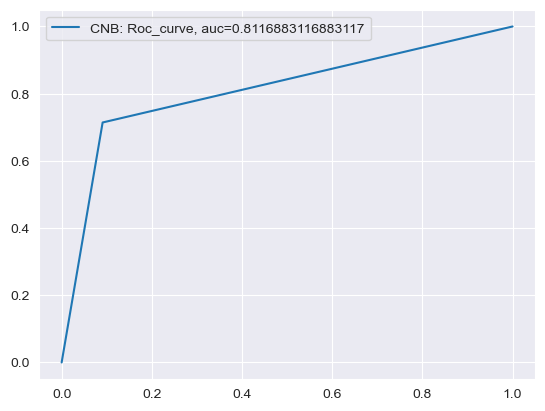

In [116]:
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_2)
auc=metrics.roc_auc_score(y_test,y_pred_2)
plt.plot(fpr,tpr, label="CNB: Roc_curve, auc=" +str(auc))
plt.legend()
plt.show()

In [117]:
sklearn.metrics.f1_score(y_test, y_pred_2, average="macro")

0.8193979933110367

Logistic Regression 

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [119]:
from math import sqrt
from sklearn.linear_model import LogisticRegression

In [120]:
log_regression_alg = LogisticRegression(solver='liblinear', max_iter=30)

In [121]:
pipeline_trois = Pipeline([
                          ('stand', StandardScaler()),
                          ('logreg',log_regression_alg)
])
                                    

In [122]:
pipeline_trois.fit(X_train,y_train)

Pipeline(steps=[('stand', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=30, solver='liblinear'))])

In [123]:
y_pred_trois = pipeline_trois.predict(X_test)

In [124]:
print(classification_report(y_test,y_pred_trois))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.33      0.29      0.31         7

    accuracy                           0.50        18
   macro avg       0.46      0.46      0.46        18
weighted avg       0.49      0.50      0.49        18



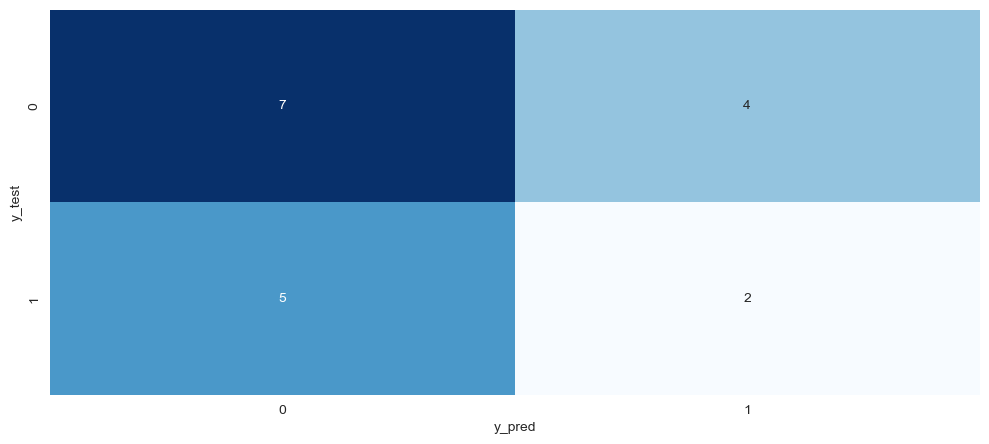

In [125]:
cm = confusion_matrix(y_test, y_pred_trois)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

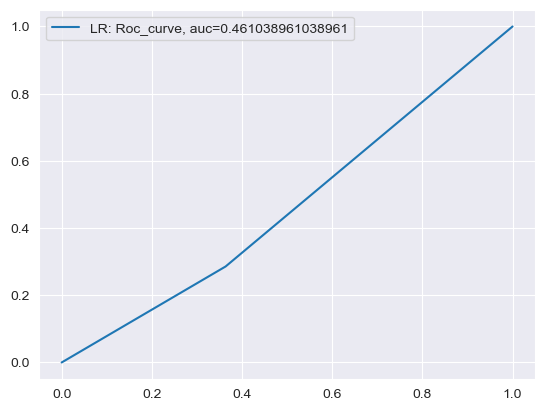

In [126]:
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_trois)
auc=metrics.roc_auc_score(y_test,y_pred_trois)
plt.plot(fpr,tpr, label="LR: Roc_curve, auc=" +str(auc))
plt.legend()
plt.show()

In [127]:
sklearn.metrics.f1_score(y_test, y_pred_trois, average="macro")

0.4581939799331104